# Movie Recommendation System




<img src='cover.jpg'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [2]:
#reading the dataset

credits_df = pd.read_csv('tmdb_5000_credits.csv')
movies_df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credits_df.shape

(4803, 4)

In [6]:
movies_df.shape

(4803, 20)

### Cleaning the Data

After going through the dataset, we notice that few columns like ```genres, keywords, production_companies, production_countries ``` are in JSON format so we carry out the next process to get it into a string format which can be easy to read

In [7]:
# converting the genres column from JSON format to string
movies_df["genres"]=movies_df["genres"].apply(json.loads)
for index,i in zip(movies_df.index,movies_df['genres']):
    l1=[]
    for j in range(len(i)):
        l1.append((i[j]['name']))# the key 'name' contains the name of the genre
    movies_df.loc[index,'genres']=str(l1)

In [8]:
# converting the keywords column
movies_df['keywords']=movies_df['keywords'].apply(json.loads)
for index,i in zip(movies_df.index,movies_df['keywords']):
    l2=[]
    for j in range(len(i)):
        l2.append((i[j]['name']))
    movies_df.loc[index,'keywords']=str(l2)

In [9]:
## converting the production_companies column
movies_df['production_companies']=movies_df['production_companies'].apply(json.loads)
for index,i in zip(movies_df.index,movies_df['production_companies']):
    l3=[]
    for j in range(len(i)):
        l3.append((i[j]['name']))
    movies_df.loc[index,'production_companies']=str(l3)

In [10]:
# converting the production_countries column 
movies_df['production_countries']=movies_df['production_countries'].apply(json.loads)
for index,i in zip(movies_df.index,movies_df['production_countries']):
    l4=[]
    for j in range(len(i)):
        l4.append((i[j]['name']))
    movies_df.loc[index,'production_countries']=str(l4)

Same way, we are converting the format from JSON to string in Credits dataset

In [11]:
# converting the cast column
credits_df['cast']=credits_df['cast'].apply(json.loads)
for index,i in zip(credits_df.index,credits_df['cast']):
    l5=[]
    for j in range(len(i)):
        l5.append((i[j]['name']))
    credits_df.loc[index,'cast']=str(l5)

In [12]:
# converting the crew column from json to string    
credits_df['crew']=credits_df['crew'].apply(json.loads)
def director_name(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits_df['crew']=credits_df['crew'].apply(director_name)
credits_df.rename(columns={'crew':'director'},inplace=True)

Now we merge both the tables as one.

In [13]:
df = movies_df.merge(credits_df,left_on='id',right_on='movie_id',how='left')

In [14]:
df.shape

(4803, 24)

In [15]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'director'],
      dtype='object')

Converting the string data into a list since there are multiple values associated with a single movie

In [16]:
df['genres']=df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['genres']=df['genres'].str.split(',')

df['keywords']=df['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['keywords']=df['keywords'].str.split(',')

df['production_companies']=df['production_companies'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['production_companies']=df['production_companies'].str.split(',')

df['production_countries']=df['production_countries'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['production_countries']=df['production_countries'].str.split(',')

df['cast']=df['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['cast']=df['cast'].str.split(',')

df['director']=df['director'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['director']=df['director'].str.split(',')

*** Dropping the missing values and not required columns***

In [19]:
#since these columns does not hold any specific data which we require for our analysis

df.drop(df[['homepage','spoken_languages','original_language']], axis=1, inplace=True)

#dropping the missing rows
df.dropna(inplace=True)

In [20]:
df.shape

(3951, 21)

## Data Visualization

### Top 10 genres

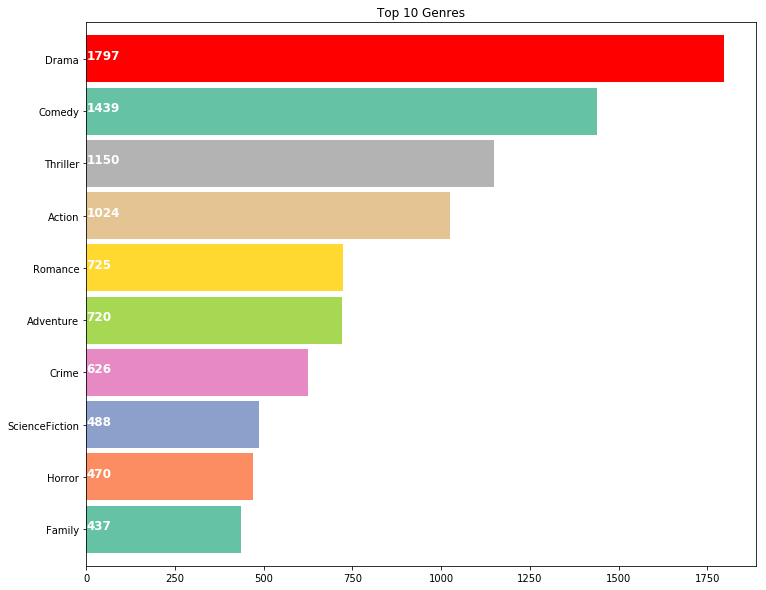

In [21]:
plt.subplots(figsize=(12,10))
l1=[]
for i in df['genres']:
    l1.extend(i)
ax=pd.Series(l1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('Set2',10))
for j, v in enumerate(pd.Series(l1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, j, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top 10 Genres')
plt.show()

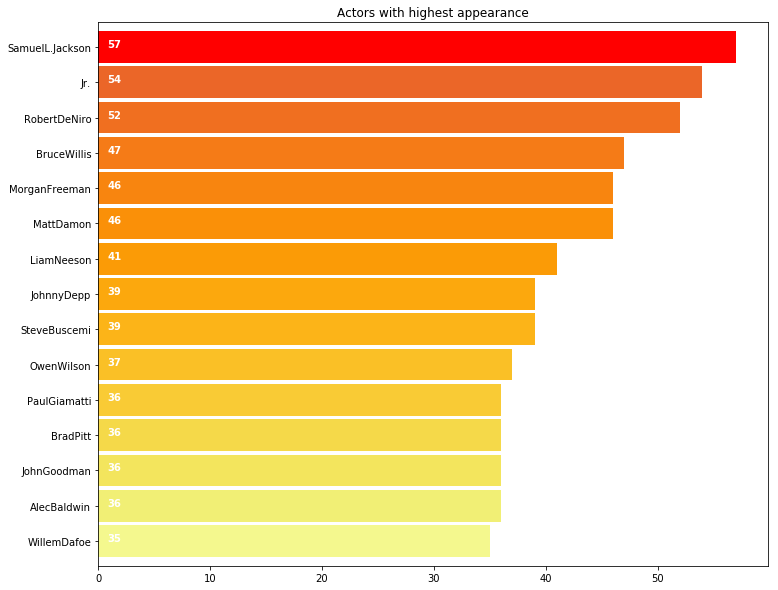

In [22]:
plt.subplots(figsize=(12,10))
l2=[]
for i in df['cast']:
    l2.extend(i)
ax=pd.Series(l2).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno_r',40))
for i, v in enumerate(pd.Series(l2).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
ax.patches[14].set_facecolor('r')
plt.show()